In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

dataset = datasets.fetch_california_housing()

In [14]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
california_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
california_df['target'] = dataset.target

In [16]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3) # , random_state=10

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f"MSE : {mse:.3f} , RMSE : {rmse:.3F}")
print(f"Variance score : {r2_score(y_test, model.predict(X_test)):.3f}")
print(f"절편 값: {model.intercept_}")
print(f"회귀 계수값: {np.round(model.coef_, 1)}")

#score = metrics.r2_score(y_train, model.predict(X_train))
#print(score)

MSE : 0.532 , RMSE : 0.729
Variance score : 0.605
절편 값: -36.97984657541926
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [26]:
print(f"선형 회귀 가중치: {model.coef_}")
print(f"선형 회귀 편향: {model.intercept_}")

선형 회귀 가중치: [ 4.33395969e-01  9.34587447e-03 -1.06253248e-01  6.31530365e-01
 -1.98198664e-06 -4.55533519e-03 -4.24414094e-01 -4.35923355e-01]
선형 회귀 편향: -36.97984657541926


In [27]:
print(f"학습 데이터 점수: {model.score(X_train, y_train)}")
print(f"평가 데이터 점수: {model.score(X_test, y_test)}")

학습 데이터 점수: 0.6065511651918615
평가 데이터 점수: 0.6051506084214331


In [53]:
import statsmodels.formula.api as smf
formula = "target~" + "+".join(california_df.iloc[:,:-1]) + "-1"
print(formula)
model_cali = smf.ols(formula=formula, data=california_df).fit()
model_cali.summary()

target~MedInc+HouseAge+AveRooms+AveBedrms+Population+AveOccup+Latitude+Longitude-1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Tue, 11 Jan 2022   Prob (F-statistic):                        0.00
Time:                        10:40:55   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5135      0.004    120.594      0.000       0.505       0.522
HouseAge       0.0157      0.000     33.727      0.000       0.015       0.017
AveRooms      -0.1825      0.006    -29.673      0.000      -0.195      -0.170
AveBedrms      0.8651      0.030     28.927      0.000       0.806       0.924
Population  7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
AveOccup      -0.0047      0.001     -8.987      0.000      -0.006      -0.004
Latitude      -0.0639      0.004    -17.826      0.000      -0.071      -0.057
Longitude     -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
formula = "target~MedInc+HouseAge+AveRooms+AveBedrms+AveOccup+Latitude+Longitude"
model_cali = smf.ols(formula=formula, data=california_df).fit()
model_cali.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:58:05   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
formula="target~MedInc+HouseAge+AveRooms+AveBedrms+Population+AveOccup+Latitude+Longitude"
from patsy import dmatrices
y, X = dmatrices(formula, california_df, return_type="dataframe")
vif = pd.DataFrame()
# variance_inflation_factor() : VIF 계산 함수
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns # X.columns : boston_df의 컬럼 이름 리스트
vif

,VIF Factor,features
0,17082.623698,Intercept
1,2.501295,MedInc
2,1.241254,HouseAge
3,8.342786,AveRooms
4,6.994995,AveBedrms
5,1.138125,Population
6,1.008324,AveOccup
7,9.297624,Latitude
8,8.962263,Longitude


In [ ]:
def get_vif(formula, df):
    from patsy import dmatrices

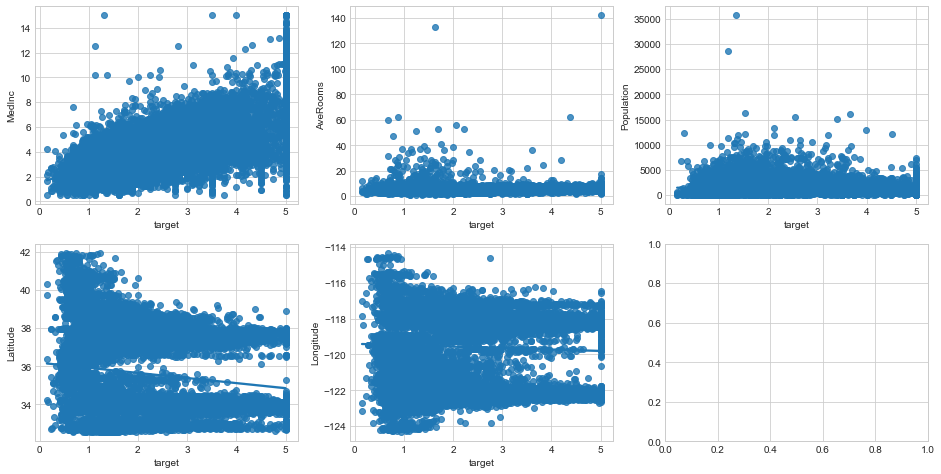

In [48]:
fig, axs = plt.subplots(figsize=(16,8), ncols=3, nrows=2)
lm_features = ['MedInc', 'AveRooms', 'Population', 'Latitude', 'Longitude']
for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x='target', y=feature, data=california_df, ax=axs[row][col])

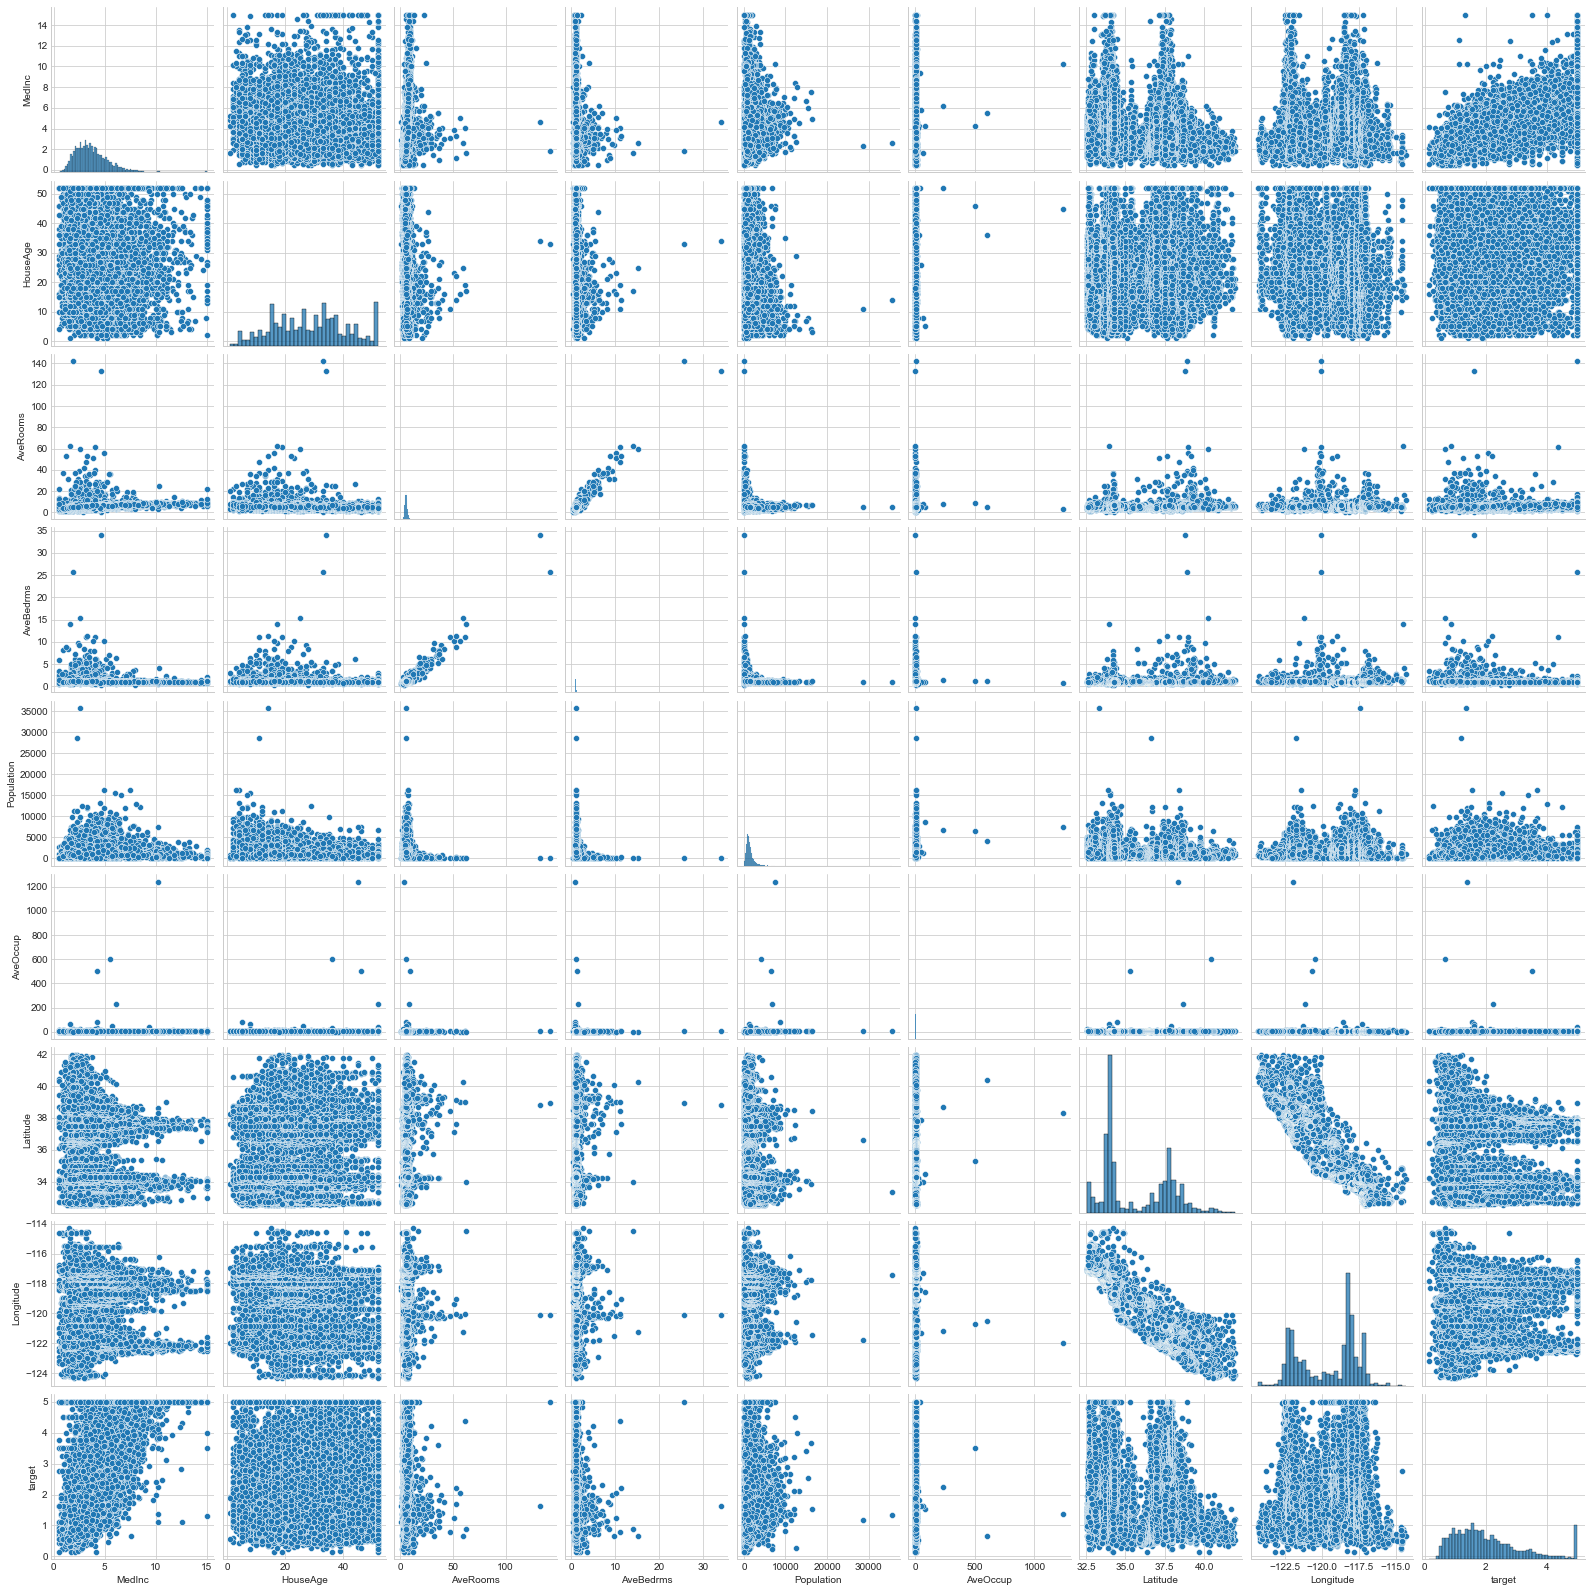

In [39]:
import seaborn as sns
sns.pairplot(california_df)